In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import math

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

In [2]:
base_path = '/home/brijesh/Ml projects/assignment_twitter/'
excel_path = 'twitter_datasets.xlsx'
datasets = pd.read_excel(base_path + excel_path, dtype={'TweetInReplyToUserID':str,'UserID':str},parse_dates=["TweetPostedTime"])

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [4]:
display_all(datasets.head())

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,2016-12-20 10:57:00,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,nan,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,2016-12-20 10:56:59,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,nan,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,2016-12-20 10:56:55,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,nan,NaN,0,0,"travel, TTOT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,2016-12-20 10:56:55,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,nan,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,2016-12-20 10:56:53,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,nan,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [5]:
print(datasets.shape)

(42368, 32)


In [6]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
TweetPostedTime              42368 non-null datetime64[ns]
TweetID                      42368 non-null int64
TweetBody                    42368 non-null object
TweetRetweetFlag             42368 non-null bool
TweetSource                  42368 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         42368 non-null object
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            42368 non-null int64
TweetFavoritesCount          42368 non-null int64
TweetHashtags                42268 non-null object
TweetPlaceID                 1000 non-null object
TweetPlaceName               1000 non-null object
TweetPlaceFullName           1000 non-null object
TweetCountry                 999 non-null object
TweetPlaceBoundingBox        1000 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 no

### Visualising labels

In [7]:
datasets['TweetRetweetCount'].describe()

count    42368.000000
mean      1081.095402
std       1432.473561
min          0.000000
25%          0.000000
50%         14.000000
75%       3069.000000
max       4056.000000
Name: TweetRetweetCount, dtype: float64

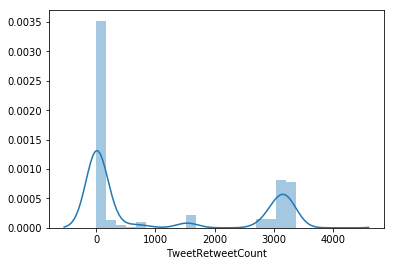

In [8]:
#histogram of TweetRetweetCount
sns.distplot(datasets['TweetRetweetCount']);

In [9]:
print('Unique TweetRetweetCount: ', len(datasets['TweetRetweetCount'].unique()))

Unique TweetRetweetCount:  194


#### From histogram, It's clear that target values are not uniformly distributed and many samples belongs to range of  0 and 3000- 3250 range.

## Feature Engineering 

#### Tweets can be of 2 types : Original Tweet and Retweet
#### 'TweetRetweetFlag' distinguish both type of tweets so I will remove all those samples which having (TweetRetweetFlag = True) because retweets might behave as redundant data

In [10]:
#changes
datasets['TweetRetweetFlag'].value_counts()

True     26862
False    15506
Name: TweetRetweetFlag, dtype: int64

In [11]:
datasets['TweetRetweetFlag'].describe()

count     42368
unique        2
top        True
freq      26862
Name: TweetRetweetFlag, dtype: object

In [12]:
datasets = datasets[datasets.TweetRetweetFlag == False] #Consider only original tweets
datasets = datasets.reset_index(drop=True)

#### Removing TweetRetweetFlag since I have all the samples which have same TweetRetweetFlag i.e False so no need to include it

In [13]:
datasets.drop(['TweetRetweetFlag'], axis=1, inplace=True)

In [14]:
print(datasets.shape)

(15506, 31)


### Dropping columns which having missing values greater than > 30%
#### Some of the columns could be important features like TweetCountry,TweetPlaceName,TweetPlaceFullName but still I removing it due to higher no of missing values

In [15]:
#missing data
total = datasets.isnull().sum().sort_values(ascending=False)
percent = (datasets.isnull().sum()/datasets.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(31) #31 is no of features

,Total,Percent
TweetPlaceAttributes,15506,1.000000
TweetPlaceContainedWithin,15506,1.000000
TweetInReplyToStatusID,15405,0.993486
TweetInReplyToScreenName,15317,0.987811
TweetCountry,14510,0.935767
TweetPlaceID,14509,0.935702
TweetPlaceName,14509,0.935702
TweetPlaceFullName,14509,0.935702
TweetPlaceBoundingBox,14509,0.935702
tweet.place,14509,0.935702


In [16]:
drop_features = ['TweetPlaceAttributes','TweetPlaceContainedWithin','TweetInReplyToStatusID',\
                 'TweetInReplyToScreenName','TweetCountry','TweetPlaceID','TweetPlaceName',\
                 'TweetPlaceFullName','TweetPlaceBoundingBox','tweet.place']

datasets.drop(drop_features,axis=1,inplace=True)

print('Dropping columns with missing values > 30% .....')

Dropping columns with missing values > 30% .....


In [17]:
print(datasets.shape)

(15506, 21)


In [18]:
print(datasets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 21 columns):
TweetPostedTime         15506 non-null datetime64[ns]
TweetID                 15506 non-null int64
TweetBody               15506 non-null object
TweetSource             15506 non-null object
TweetInReplyToUserID    15506 non-null object
TweetRetweetCount       15506 non-null int64
TweetFavoritesCount     15506 non-null int64
TweetHashtags           15406 non-null object
UserID                  15506 non-null object
UserName                15506 non-null object
UserScreenName          15506 non-null object
UserLocation            10959 non-null object
UserDescription         13153 non-null object
UserLink                11006 non-null object
UserExpandedLink        10986 non-null object
UserFollowersCount      15506 non-null int64
UserFriendsCount        15506 non-null int64
UserListedCount         15506 non-null int64
UserSignupDate          15506 non-null object
UserTweetCount 

#### Droping irrelavant features

In [19]:
drop_features_irrelevant = ['UserSignupDate','UserExpandedLink','TweetSource','UserLink'
                ,'UserScreenName','UserName','UserDescription','TweetID','UserID']

datasets.drop(drop_features_irrelevant,axis=1,inplace=True)

print('dropping irrelevant columns .....')

dropping irrelevant columns .....


In [20]:
datasets.shape

(15506, 12)

#### Creating new feature i.e hashtags_count which gives number of hashtag in tweets
#### More no of hashtags that means more chances are to reach maximum users which can help predicting no of retweets (can be a important features)

In [21]:
datasets['TweetHashtags'].fillna('',inplace=True)
datasets['hashtags_count']=[len(v.split(',')) for v in datasets['TweetHashtags'].values]

#### Creating new features using 'TweetPostedTime' 

In [22]:
fldname = 'TweetPostedTime'
fld = datasets[fldname]
fld_dtype = fld.dtype

targ_pre = re.sub('[Dd]ate$', '', fldname)

attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
        'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

attr = attr + ['Hour', 'Minute', 'Second']
for n in attr: datasets[targ_pre + n] = getattr(fld.dt, n.lower())
datasets[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
datasets.drop(fldname, axis=1, inplace=True)

#### Analysing numeric features to handle missing data and imputing with dummy values

In [23]:
datasets['TweetFavoritesCount'].describe()

count    15506.000000
mean         2.188056
std         61.490518
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       2813.000000
Name: TweetFavoritesCount, dtype: float64

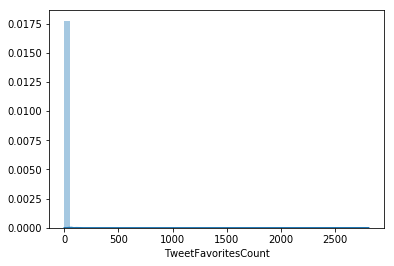

In [24]:
#histogram of TweetFavoritesCount
sns.distplot(datasets['TweetFavoritesCount']);

In [25]:
print('Unique TweetFavoritesCount: ', len(datasets['TweetFavoritesCount'].unique()))

Unique TweetFavoritesCount:  63


#### From above its clear that 75% of data have TweetFavoritesCount equals 0, that means this feature might be irrelevant but still I'm considering for now.

In [26]:
numerical = ['TweetFavoritesCount','UserTweetCount','UserListedCount','UserFriendsCount','UserFollowersCount']

for n in numerical:
    datasets[n].fillna(0,inplace=True)
    
for c in datasets.columns:
    if datasets[c].dtype == 'object':datasets[c].fillna('none',inplace=True)
    else:datasets[c].fillna(-1,inplace=True)

#### Scatterplot among few numeric variables

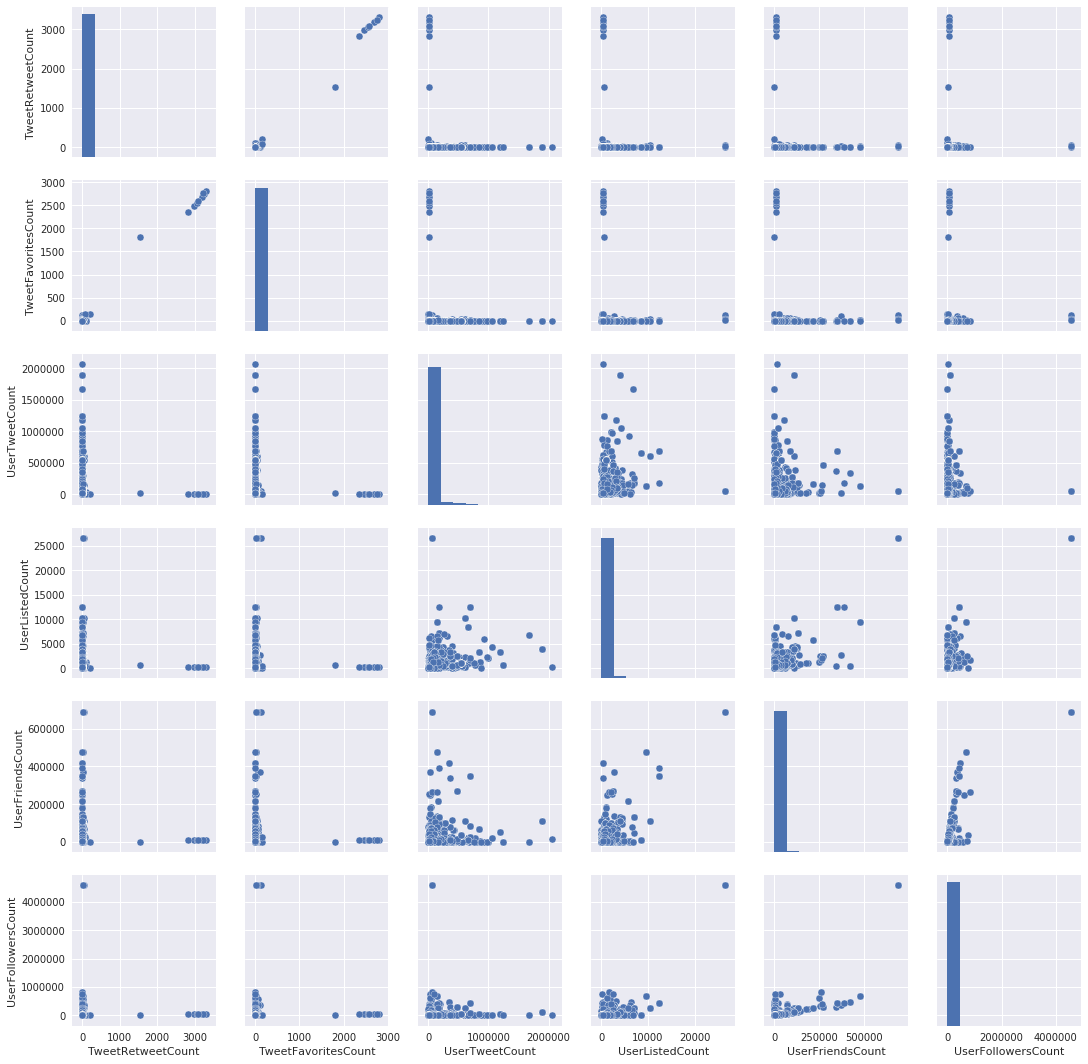

In [27]:
#scatterplot
sns.set()
cols = ['TweetRetweetCount', 'TweetFavoritesCount', 'UserTweetCount', 'UserListedCount', 'UserFriendsCount', 'UserFollowersCount']
sns.pairplot(datasets[cols], size = 2.5)
plt.show();

#### Scatterplot indicates that above features do not have any uniform pattern against our target dependent variable i.e TweetRetweetCount

### Create tfidf feaures from tweet body

In [28]:
#text transformation (stopwords,lowering,stemming) and creating bag of words model using TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [29]:
corpus = []
for i in range(0, len(datasets)):
    review = re.sub('@[\w]*', '', datasets['TweetBody'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
datasets['clean_tweet'] = corpus
datasets['clean_tweet'][:5]

0    seven question choos cruis line travel ttot ht...
1    imag pari apart dinner music danc amaz travel ...
2    look perfect christma gift give gift confid ho...
3    news east africa swahili word know travel east...
4    latest blog post seminyak top dine spot amp mu...
Name: clean_tweet, dtype: object

In [31]:
#max_df is used for removing terms that appear too frequently
#min_df is used for removing terms that appear too infrequently

#Without specifying this, I was getting memory error in next shell (Need to fix it!)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=.0025, max_df=.1,stop_words='english')
#tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(datasets['clean_tweet'])

#### Since we have new fetures 'clean_tweet' corpus generated from TweetBody hence we drop 'clean_tweet','TweetHashtags' and 'TweetBody'

In [32]:
df1 = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
datasets.drop(['clean_tweet','TweetHashtags','TweetBody'], axis=1, inplace=True)
datasets = pd.concat([datasets, df1], axis=1)

In [33]:
print(datasets.shape)

(15506, 475)


#### Numericalize categorical data 

In [34]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [35]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()
            
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1

In [36]:
train_cats(datasets)

In [37]:
def proc_cat_data(df,y_fld,max_n_cat=None):
    
    df = df.copy()
    target = df[y_fld].values
    df.drop([y_fld], axis=1, inplace=True)

    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    
    return df,target

In [38]:
raw_x,raw_y = proc_cat_data(datasets,'TweetRetweetCount')

In [39]:
print(raw_x.shape,raw_y.shape)

(15506, 474) (15506,)


In [40]:
display_all(raw_x.head(5))

,TweetInReplyToUserID,TweetFavoritesCount,UserLocation,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber,hashtags_count,TweetPostedTimeYear,TweetPostedTimeMonth,TweetPostedTimeWeek,TweetPostedTimeDay,TweetPostedTimeDayofweek,TweetPostedTimeDayofyear,TweetPostedTimeIs_month_end,TweetPostedTimeIs_month_start,TweetPostedTimeIs_quarter_end,TweetPostedTimeIs_quarter_start,TweetPostedTimeIs_year_end,TweetPostedTimeIs_year_start,TweetPostedTimeHour,TweetPostedTimeMinute,TweetPostedTimeSecond,TweetPostedTimeElapsed,ad,add,adventur,advic,africa,agenc,agent,air,airbnb,airlin,airport,amaz,america,amp,amsterdam,anim,anoth,apart,app,architectur,art,asia,australia,away,awesom,babi,backpack,bag,bake,bali,bangkok,bar,beach,beauti,berlin,best,big,blog,blogger,blue,bodi,book,box,brand,brazil,break,breast,brooklyn,bucketlist,budget,build,busi,buy,cafe,california,canada,cancer,car,card,celebr,chanc,chang,chapter,cheap,check,china,christma,citi,clownfish,coast,code,cold,collect,color,come,compani,connect,conozcopablo,coral,countri,credit,cruis,cuba,cultur,custom,daili,date,day,dc,deal,decemb,decor,design,destin,di,discov,dog,download,dream,drink,drive,dubai,earth,east,eat,ebook,el,en,end,enjoy,enter,europ,event,everi,everyon,experi,explor,fall,famili,familytravel,fashion,favorit,featur,feel,festiv,fish,fishtank,fli,flight,florida,follow,food,foodi,franc,free,friend,frizemedia,fun,game,germani,gift,girl,giveaway,good,got,grand,great,greec,green,gt,guid,happi,hawaii,head,healthi,help,hike,histori,home,hongkong,hospit,hot,hotel,hour,hous,iceland,idea,imag,india,indonesia,info,inn,inspir,instagood,instagram,instatravel,intern,invas,island,itali,japan,japanes,japantravel,job,join,journey,jual,kid,know,korea,kyoto,la,lake,landscap,latest,learn,leav,let,lexington,liburan,life,lifestyl,light,like,line,linkedin,list,littl,live,lo,local,locat,london,lone,look,lost,lot,love,loyalti,lp,lt,luggag,luxuri,luxurytravel,lyft,magic,make,mani,map,marinelif,market,meet,merri,mexico,mind,minut,mom,moment,money,morn,mountain,mt,music,nation,natur,need,new,news,newyear,newyork,newzealand,nice,night,np,nyc,ocean,offer,oh,old,onlin,open,order,pack,packag,paradis,pari,park,parti,payday,pdf,penginapan,peopl,perfect,periscop,person,peru,pesan,philippin,photo,photograph,photographi,photooftheday,pic,pictur,place,plan,plane,planet,pleas,pmunc,point,popular,portug,post,present,pretti,price,prize,promo,properti,px,quot,read,readi,realli,reason,recip,red,redsea,reef,reefcandi,reeftank,relax,rent,resort,restaur,review,ride,right,rio,river,road,roadtrip,rock,romanc,rome,room,rt,rtw,sale,san,santa,save,sea,search,season,secret,servic,set,share,ship,shop,sign,singapor,site,ski,sky,snow,social,south,spain,special,spirit,spot,st,star,start,stay,stock,stop,stori,storystream,street,stun,style,suit,summer,sun,sunris,sunset,support,sweep,sydney,tag,tcot,tech,templ,th,thailand,thank,thing,think,ti,ticket,time,tip,tiyf,tlot,today,tokyo,tour,tourism,tourist,town,tradit,train,travelblog,travelblogg,travelgram,travelmass,travelphotographi,travelpix,traveltip,traveltuesday,tree,tri,trip,tsa,ttot,turismo,turkey,tv,twitter,uk,univers,usa,use,vacat,valu,vantag,vega,viaj,video,vietnam,view,vintag,violat,visit,walk,wanderlust,want,watch,water,way,weather,wed,week,weekend,white,win,wine,winter,wisata,wonder,work,world,xma,year,york
0,156,0,514,23433,24762,961,147958,0,2,2016,12,51,20,1,355,False,False,False,False,False,False,10,56,55,1482231415,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### Evaluating whether all the features are ready to fit into model and free from missing values

In [41]:
raw_x.isnull().sum().max() #just checking that there's no missing data

0

## Splitting datasets into training and validation sets

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(raw_x, raw_y, test_size = 0.1, random_state = 0)

In [44]:
print(X_train.shape,y_train.shape)

(13955, 474) (13955,)


In [45]:
print(X_valid.shape,y_valid.shape)

(1551, 474) (1551,)


## Training and Evaluation

In [46]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf = RandomForestRegressor(n_estimators=60,max_features=0.4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
def rmse(x,y): return math.sqrt(((np.round(x)-y)**2).mean())

def print_score(m):
    
    print('training error ....')
    print(rmse(m.predict(X_train), y_train))
    print('validataion error .....')
    print(rmse(m.predict(X_valid), y_valid))
    
    print('print R2 score ... ')
    print(m.score(X_train, y_train), m.score(X_valid, y_valid))

In [49]:
print_score(rf)

training error ....
7.0797018602953905
validataion error .....
20.03695811549856
print R2 score ... 
0.9899941727637708 0.9402361268821885


#### Training error and validation error is not that much good and on other hand R-square showing good result.
#### This time RMSE and R Square are nearly correlated and make sense unlike previous build

### Trying with Linear Regression polynomial and Plotting error graph

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [51]:
#Polynomial Regression with Degree 1

d=1
poly = PolynomialFeatures(degree=d)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_valid)

lg = LinearRegression()
print("===================== degree {}=================".format(d))
# Fit

lg.fit(X_, y_train)

print('training error ....')
print(rmse(lg.predict(X_), y_train))

print('validataion error .....')
print(rmse(lg.predict(X_test_), y_valid))

print('print R2 score ... ')
print(lg.score(X_, y_train), lg.score(X_test_, y_valid))
print("==================================================")

===================== degree 1=================
training error ....
5.8380631214804914
validataion error .....
6.310726900822391
print R2 score ... 
0.9932093729855891 0.9940973240615518


### Fitting ElasticNet model to datasets (Just a random try!)

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
print_score(regr)

training error ....
6.000824020807425
validataion error .....
1.524779211591167
print R2 score ... 
0.9928143854822611 0.9996618266059227


In [55]:
#degree 0 means RandomForestRegression
#degree 1 means Polynomial with degree 1
#degree 2 means ElasticNet

degree = [0,1,2]
rsme_train_error = [7.337695628793126,5.8380631214804914,6.000824020807425]
rsme_val_error = [19.47461109012298,6.310726900822391,1.524779211591167]
rsq_train = np.array([0.989233457891063,0.9932093729855891,0.9928143854822611])*100
rsq_val = np.array([0.9434869752053238,0.9940973240615518,0.9996618266059227])*100

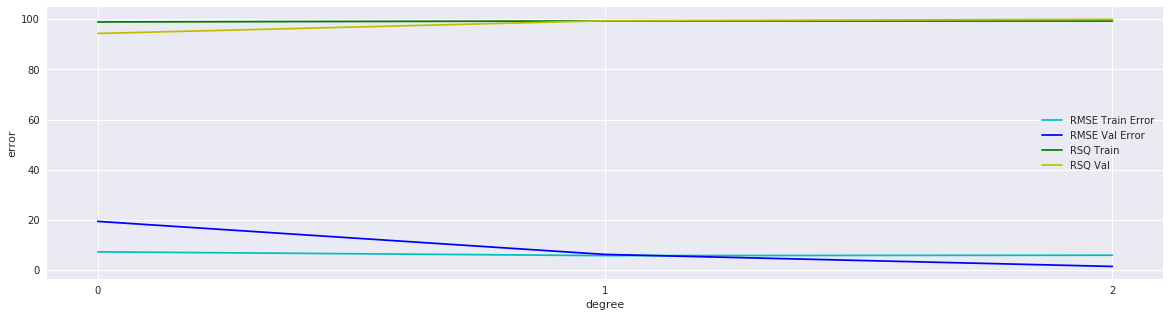

In [56]:
plt.figure(figsize=(20,5))
plt.xticks(range(0,5,1))
plt.xlabel('degree')
plt.ylabel('error')
plt.plot(degree,rsme_train_error,'c')
plt.plot(degree,rsme_val_error,'b')
plt.plot(degree,rsq_train,'g')
plt.plot(degree,rsq_val,'y')
plt.gca().legend(('RMSE Train Error','RMSE Val Error','RSQ Train','RSQ Val'))
plt.show()

### Saving and Loading model

In [57]:
!pip install pickle

  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
#saving
import pickle as cPickle
with open('best_model.pkl', 'wb') as file:
    cPickle.dump(rf, file)

In [59]:
#loading
with open('best_model.pkl', 'rb') as file:
    model = cPickle.load(file)

# Let's have a look on Importance of each features

In [60]:
fi = pd.DataFrame({'cols':raw_x.columns, 'imp':rf.feature_importances_}).sort_values('imp', ascending=False)

In [61]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [62]:
to_keep = fi[fi.imp>0.004].cols; len(to_keep);to_keep

1         TweetFavoritesCount
338                      rent
3          UserFollowersCount
4            UserFriendsCount
355                       san
440                       usa
242                      love
6              UserTweetCount
2                UserLocation
23      TweetPostedTimeSecond
22      TweetPostedTimeMinute
57                      beach
25                         ad
374                     south
5             UserListedCount
442                     vacat
217                      lake
189                      hous
351                      room
21        TweetPostedTimeHour
276                      nice
24     TweetPostedTimeElapsed
8              hashtags_count
433                      ttot
Name: cols, dtype: object

In [63]:
new_trn_df = raw_x[to_keep].copy()

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(raw_x, raw_y, test_size = 0.1, random_state = 0)

In [65]:
m = RandomForestRegressor(n_estimators=60,max_features=0.4, n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
print_score(m)

training error ....
7.866678407382227
validataion error .....
19.498929528057882
print R2 score ... 
0.9876152067706148 0.943317670116772


### We can use Dimensionality Reduction to visualize regression fit to our datasets like Kernel PCA or LDA
### Again fitting model to new datasets with reduced dimentions

In [67]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_new = kpca.fit_transform(X_train)
X_test_new = kpca.transform(X_valid)

In [68]:
rf_new = RandomForestRegressor(n_estimators=60,max_features=0.4, n_jobs=-1)
rf_new.fit(X_train_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
print('training error ....')
print(rmse(rf_new.predict(X_train_new), y_train))

print('validataion error .....')
print(rmse(rf_new.predict(X_test_new), y_valid))

print('print R2 score ... ')
print(rf_new.score(X_train_new, y_train), rf_new.score(X_test_new, y_valid))

training error ....
70.72150557482733
validataion error .....
81.94418694659882
print R2 score ... 
0.00012116307296772265 3.8308137785492136e-05


### Visualizing Decision tree

In [71]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [72]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [73]:
# Export the image to a dot file
feature_list = list(raw_x.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [74]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [75]:
# Write graph to a png file
graph.write_png('new_tree.png')

### work_summary
#### EDA (Filtering out samples with TweetRetweetFlag = True + Dropping features (missing value > 30%) and Irrelevant features + Visualizing target variable i.e TweetRetweetCount)
#### Feature Engineering (Generating new features, TFIDF same as Ali's )
#### I tried with these model Linear Regression(Polynomial), ElasticNet, Random Forest Regression
#### Random Forest working well for this datasets (Error metrics like RMSE and RSE justifies it)

### This Datasets may containing noisy samples and therefore error metrics is inconsistent for other machine learning algorithms.